<a href="https://colab.research.google.com/github/YaelLopezS/Inteligencia-artificial-avanzada-para-la-ciencia-de-datos/blob/main/EstadisticaDescriptiva_Ecobici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

#Nuestras librerias para nuestro modelo que determinara si se puede predecir un viaje atipico o no
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

#Extract

In [2]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/02/2025-01.csv"

csv_file_name = "2025-01.csv"

print(F"Downloading {url} to {csv_file_name}")

try:
  response = requests.get(url, timeout=1200)
  response.raise_for_status()
  print("Descarga completada con exito")


except requests.exceptions.Timeout as e:
  print(f"Error de timeout durante la descarga: {e}")
  df_raw = pd.DataFrame()

except requests.exceptions.RequestException as e:
  print(f"Error durante la descarga: {e}")
  df_raw = pd.DataFrame()

Descarga completada con exito


In [3]:
with open(csv_file_name, "wb") as f:
  f.write(response.content)
print(f"Archivo zip guardado como: {csv_file_name}")

print(f"Leyendo datos desde: {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Extraccion completada con exito")
print(f"Se cargaron: {df_raw.shape[0]} registros.")

Archivo zip guardado como: 2025-01.csv
Leyendo datos desde: 2025-01.csv
Extraccion completada con exito
Se cargaron: 1809775 registros.


In [4]:
print("Tamaño del Dataframe:")
print(df_raw.shape)

print("\nPrevisualizacion del Dataframe:")
display(df_raw.head(5))

Tamaño del Dataframe:
(1809775, 9)

Previsualizacion del Dataframe:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,26.0,5180930,568,31/12/2024,23:57:02,572,01/01/2025,00:00:03
1,F,54.0,3653953,283,31/12/2024,23:51:40,596,01/01/2025,00:00:41
2,M,38.0,7511322,034,31/12/2024,23:48:36,064,01/01/2025,00:00:59
3,M,41.0,3804572,258,31/12/2024,23:54:11,023,01/01/2025,00:01:08
4,M,35.0,3848405,043,31/12/2024,23:35:28,126,01/01/2025,00:01:17


Solamente hay 1 valor nulo en Gnero_Usuario y 147 en la edad del usuario

In [5]:
#Buscamos los valores nulos
df_raw.isnull().sum()

,0
Genero_Usuario,1
Edad_Usuario,147
Bici,0
Ciclo_Estacion_Retiro,0
Fecha_Retiro,0
Hora_Retiro,0
Ciclo_EstacionArribo,0
Fecha_Arribo,0
Hora_Arribo,0


In [6]:
#Visualizamps las estadisticas de cada columna
df_raw.describe(include='all')

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
count,1809774,1.809628e+06,1.809775e+06,1809775,1809775,1809775,1809775,1809775,1809775
unique,4,NaN,NaN,677,39,69767,678,31,70871
top,M,NaN,NaN,271-272,29/01/2025,18:05:49,271-272,29/01/2025,18:34:56
freq,1252895,NaN,NaN,13283,75113,74,21628,75079,73
mean,NaN,3.400352e+01,5.456875e+06,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.798162e+00,2.021560e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.600000e+01,2.000461e+06,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,3.726999e+06,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.200000e+01,5.452651e+06,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.900000e+01,7.213432e+06,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Vemos el tipo de cada columna
df_raw.dtypes

,0
Genero_Usuario,object
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Fecha_Retiro,object
Hora_Retiro,object
Ciclo_EstacionArribo,object
Fecha_Arribo,object
Hora_Arribo,object


In [8]:
#Visualizamos duplicados
df_raw.duplicated().sum()

np.int64(0)

In [9]:
# Visualizamos los valores en la columna del genero
print(df_raw["Genero_Usuario"].value_counts(dropna=False))
print("\nValores únicos:")
print(df_raw["Genero_Usuario"].unique())

Genero_Usuario
M      1252895
F       502211
O        34432
?        20236
NaN          1
Name: count, dtype: int64

Valores únicos:
['M' 'F' 'O' '?' nan]


#Transform

In [10]:
# Rellenamos los campos faltantes de la edad utilizando la media
media_edad = df_raw["Edad_Usuario"].mean()
df_raw["Edad_Usuario"] = df_raw["Edad_Usuario"].fillna(media_edad)

In [11]:
# Filtramos solo los valores F y M para que no haya ningun otro, los demas los dejamos como NAN
df_raw["Genero_Usuario"] = df_raw["Genero_Usuario"].where(df_raw["Genero_Usuario"].isin(["M", "F"]))

# Imputamos los faltantes con la moda
frecuencia_genero = df_raw["Genero_Usuario"].mode()[0]
df_raw["Genero_Usuario"] = df_raw["Genero_Usuario"].fillna(frecuencia_genero)

# Usamos one hot para que M = 1 y F = 0
df_raw["Genero_Usuario"] = df_raw["Genero_Usuario"].map({"M": 1, "F": 0})

In [12]:
#Vamos a cambiar el formato de las fechas y horas ahora a datetime
df_raw["Fecha_Retiro"] = pd.to_datetime(df_raw["Fecha_Retiro"] + " " + df_raw["Hora_Retiro"], format="%d/%m/%Y %H:%M:%S")
df_raw["Fecha_Arribo"] = pd.to_datetime(df_raw["Fecha_Arribo"] + " " + df_raw["Hora_Arribo"], format="%d/%m/%Y %H:%M:%S")

In [13]:
df_raw.dtypes

,0
Genero_Usuario,int64
Edad_Usuario,float64
Bici,int64
Ciclo_Estacion_Retiro,object
Fecha_Retiro,datetime64[ns]
Hora_Retiro,object
Ciclo_EstacionArribo,object
Fecha_Arribo,datetime64[ns]
Hora_Arribo,object


In [14]:
# Vamos a calculaer ahora esta duracion de los viajes en minutos
df_raw["Duracion_Minutos"] = (df_raw["Fecha_Arribo"] - df_raw["Fecha_Retiro"]).dt.total_seconds() / 60

In [15]:
# Ahora creamos una funcion para discretizar la duracion de cada viaje en categiorias para ver si es un viaje cortom, mediano, largo, etc.
def categorizar_duracion(minutos):
    if minutos <= 30:
        return "Viaje corto"
    elif minutos <= 90:
        return "Viaje mediano"
    elif minutos <= 180:
        return "Viaje largo"
    else:
        return "Viaje muy largo"

df_raw["Categoria_Viaje"] = df_raw["Duracion_Minutos"].apply(categorizar_duracion)

In [16]:
# Ahora visualizamos
print(df_raw[["Duracion_Minutos", "Categoria_Viaje"]].head())
print("\nCada categoria tiene este numero de valores:")
print(df_raw["Categoria_Viaje"].value_counts())

   Duracion_Minutos Categoria_Viaje
0          3.016667     Viaje corto
1          9.016667     Viaje corto
2         12.383333     Viaje corto
3          6.950000     Viaje corto
4         25.816667     Viaje corto

Cada categoria tiene este numero de valores:
Categoria_Viaje
Viaje corto        1631804
Viaje mediano       175512
Viaje largo           1900
Viaje muy largo        559
Name: count, dtype: int64


In [17]:
#Ahora utilizamos one hot para pasar a unos y ceros la columna de categoria_viaje
df_raw = pd.get_dummies(df_raw, columns=["Categoria_Viaje"], prefix="Tipo_Viaje")

In [18]:
# Visualizamos que se haya hecho el one hot
print(df_raw.filter(like="Tipo_Viaje_").head())
print([col for col in df_raw.columns if "Tipo_Viaje_" in col])

   Tipo_Viaje_Viaje corto  Tipo_Viaje_Viaje largo  Tipo_Viaje_Viaje mediano  \
0                    True                   False                     False   
1                    True                   False                     False   
2                    True                   False                     False   
3                    True                   False                     False   
4                    True                   False                     False   

   Tipo_Viaje_Viaje muy largo  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
['Tipo_Viaje_Viaje corto', 'Tipo_Viaje_Viaje largo', 'Tipo_Viaje_Viaje mediano', 'Tipo_Viaje_Viaje muy largo']


In [19]:
df_raw.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Duracion_Minutos,Tipo_Viaje_Viaje corto,Tipo_Viaje_Viaje largo,Tipo_Viaje_Viaje mediano,Tipo_Viaje_Viaje muy largo
0,1,26.0,5180930,568,2024-12-31 23:57:02,23:57:02,572,2025-01-01 00:00:03,00:00:03,3.016667,True,False,False,False
1,0,54.0,3653953,283,2024-12-31 23:51:40,23:51:40,596,2025-01-01 00:00:41,00:00:41,9.016667,True,False,False,False
2,1,38.0,7511322,034,2024-12-31 23:48:36,23:48:36,064,2025-01-01 00:00:59,00:00:59,12.383333,True,False,False,False
3,1,41.0,3804572,258,2024-12-31 23:54:11,23:54:11,023,2025-01-01 00:01:08,00:01:08,6.950000,True,False,False,False
4,1,35.0,3848405,043,2024-12-31 23:35:28,23:35:28,126,2025-01-01 00:01:17,00:01:17,25.816667,True,False,False,False


In [20]:
# Pasamos las columnas de tipo de viaje a unos y ceros
cols_tipo_viaje = [col for col in df_raw.columns if "Tipo_Viaje_" in col]
df_raw[cols_tipo_viaje] = df_raw[cols_tipo_viaje].astype(int)

In [21]:
# Eliminamos edades outliers
df_raw = df_raw[(df_raw["Edad_Usuario"] >= 10) & (df_raw["Edad_Usuario"] <= 90)]

# Medias de tendencia central

Vamos a calcular la **media**, la **mediana** y la **moda** de las columnas numericas de nuestro dataset



*   Media: Es el promedio de todos los datos, calculado sumando todos los valores y dividiendo por la cantidad de datos.

*   Mediana: Es el valor que divide un conjunto de datos ordenados en dos partes iguales, es decir, el valor central.

*   Moda: Es el valor que más se repite en un conjunto de datos.

In [49]:
# Seleccionamos las columnas numericas de nuestro dataset
numericas = df_raw.select_dtypes(include=["int64", "float64"])

# Calculamos las medias de tendencia central en estas columnas
medidas_central = pd.DataFrame({
    "Media": numericas.mean(),
    "Mediana": numericas.median(),
    "Moda": numericas.mode().iloc[0]
})

# Redondeamos
medidas_central = medidas_central.round(2)

# Observamos los resultados
print("            --- Medidas de tendencia central ---")
display(medidas_central)

            --- Medidas de tendencia central ---


,Media,Mediana,Moda
Genero_Usuario,0.72,1.0,1.00
Edad_Usuario,34.00,32.0,30.00
Bici,5456907.66,5452651.0,8537367.00
Duracion_Minutos,15.93,11.9,5.78
Tipo_Viaje_Viaje corto,0.90,1.0,1.00
Tipo_Viaje_Viaje largo,0.00,0.0,0.00
Tipo_Viaje_Viaje mediano,0.10,0.0,0.00
Tipo_Viaje_Viaje muy largo,0.00,0.0,0.00
Viaje_Atipico,0.00,0.0,0.00


# Estadistica descriptiva

**Objetivo**: Predecir viajes atipicos mayor a una hora

Posibles consecuencias o razones de esto:

*   Robo
*   Daño
*   Clasificacion


**Creamos nuestra variable objetivo**

In [22]:
# Creamos una variable binaria que nos dara 1 si el viaje dura mas de una hora y 0 si no
df_raw["Viaje_Atipico"] = (df_raw["Duracion_Minutos"] > 60).astype(int)
print(df_raw["Viaje_Atipico"].value_counts(normalize=True))

Viaje_Atipico
0    0.996119
1    0.003881
Name: proportion, dtype: float64


**Seleccionamos nuestras features para nuestro modelo**

In [23]:
# Primero vamos a extraer la hora y el dia de la semana para ver si hay un patron en que cierto rango de horas o de dias es donde se tiende a ocurrir estos robos/incidentes
df_raw["Hora_Retiro_Num"] = pd.to_datetime(df_raw["Hora_Retiro"], format="%H:%M:%S").dt.hour
df_raw["Dia_Semana_Retiro"] = pd.to_datetime(df_raw["Fecha_Retiro"]).dt.dayofweek

# Seleccionamos nuestras features
features = ["Edad_Usuario", "Genero_Usuario", "Hora_Retiro_Num", "Dia_Semana_Retiro"]
X = df_raw[features]
y = df_raw["Viaje_Atipico"]

**Entrenamos nuestro modelo de clasificacion**

In [24]:
# Hacemos la division de los datos para entrenar nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Vamos a usar el 80% de de nuestros datos para entrenar a nuestro modelo y depsues el otro 20% lo usaremos en las pruebas para ver su efectividad

# Entrenamos nuestro modelo
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Evaluamos nuestro modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    360531
           1       0.00      0.00      0.00      1393

    accuracy                           1.00    361924
   macro avg       0.50      0.50      0.50    361924
weighted avg       0.99      1.00      0.99    361924



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Visualizamos la matriz de confusion**

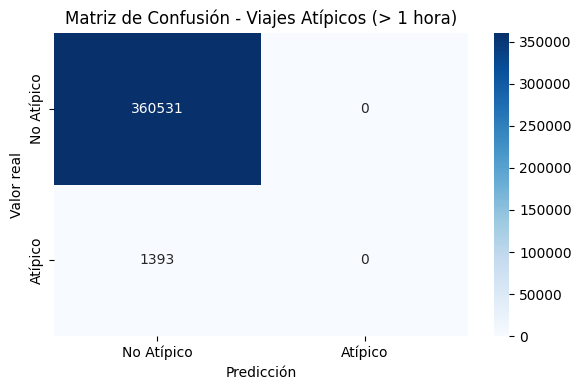

In [30]:
# Calculamos nuestra matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Graficamos
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Atípico", "Atípico"], yticklabels=["No Atípico", "Atípico"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Viajes Atípicos (> 1 hora)")
plt.tight_layout()
plt.show()

Vamos a visualizar por medio de la curva ROC para ver que tan bien el modelo separa nuestras clases que tenemos

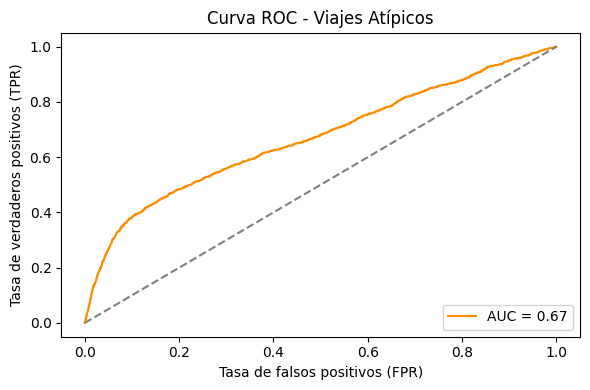

In [35]:
# Probabilidad de una clase positiva (viaje atipico)
y_probs = model.predict_proba(X_test)[:, 1]

# Nuestra curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Viajes Atípicos")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Vamos a ver el trade-off entre detectar mas casos y que se equivoque menos nuestro modelo

Si nos sale un valor muy bajo quiere decir que el modelo tiene dificultades para identificar correctamente los viajes atipicos sin generar muchos falsos positivos

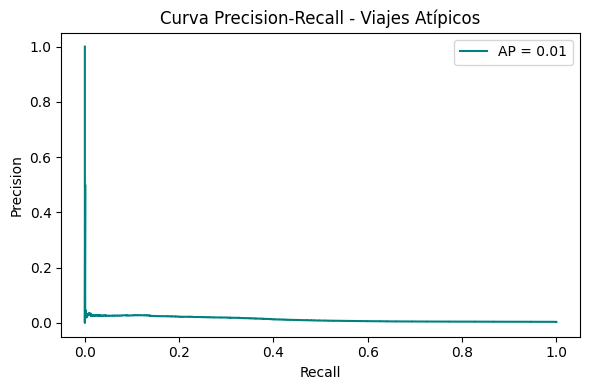

In [36]:
# Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f"AP = {avg_precision:.2f}", color="teal")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Viajes Atípicos")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

#Conclusion con regresion lineal

Este modelo no me es efectivo en esta situacion ya que no logro predecir ningun viaje atipico, debido a que solo como el 0.4% de los viajes son atipicos no hay suficientes datos para entrenarlo o predecir este suceso con este modelo, debido a que solo el 0.4% de los viajes son atipicos y que las metricas de desempeño de nuestro modelo salieron muy altas pues en cierta forma es engañoso debido a que por esa razon el modelo casi siempre va a acertar, pero no es asi ya que no predijo ninguno de los escenarios atipicos, simplemente aprendio.